In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/phitronio/Python-for-ML/refs/heads/main/final-employee-ds.csv')
df.head()

,EmployeeID,Name,Age,Gender,Department,ExperienceYears,Salary,WorkHoursPerWeek,PerformanceScore,JoinDate,Tshirt_size,ProjectCount,TrainingHours,DepartmentRating
0,101,Employee_1,50,Male,IT,17,86175.0,44,71,2010-01-10,L,2,4,1
1,102,Employee_2,36,Male,Finance,1,47805.0,44,68,2017-11-11,S,4,18,4
2,103,Employee_3,29,Male,Marketing,16,45237.0,44,69,2012-03-08,S,6,13,3
3,104,Employee_4,42,Male,Marketing,12,60056.0,48,76,2012-10-12,M,2,25,4
4,105,Employee_5,40,Female,Finance,19,85543.0,36,97,2014-12-30,XL,8,3,4


Question : 1

Load the TrainingHours column into a NumPy array.
Convert to float datatype


Find mean & standard deviation

Final output: Two numeric values






In [139]:
TrainingHours_array = df['TrainingHours'].to_numpy()
TrainingHours_array = TrainingHours_array.astype(np.float64)
print(type(TrainingHours_array))
print(TrainingHours_array.dtype)

print('Mean: ',TrainingHours_array.mean())
print('Standard deviation: ',TrainingHours_array.std())


<class 'numpy.ndarray'>
float64
Mean:  24.19
Standard deviation:  13.842467265628624


Question : 2
20 Marks

Handle missing values (if any):

Fill missing Salary with department-wise median


Calculate total Salary sum for employees with ExperienceYears > 12 and ProjectCount > 5
 
Final output: One numeric value

In [4]:
df.isnull().sum()

EmployeeID          0
Name                0
Age                 0
Gender              0
Department          0
ExperienceYears     0
Salary              4
WorkHoursPerWeek    0
PerformanceScore    0
JoinDate            0
Tshirt_size         0
ProjectCount        0
TrainingHours       0
DepartmentRating    0
dtype: int64

In [5]:
df.isnull().sum()
df['Salary'] = df.groupby('Department')['Salary'].transform(lambda x: x.fillna(x.mean()))
new_df = df[(df['ExperienceYears']>12)&(df['ProjectCount']>5)]
print(new_df.head())
print('Salary Sum: ',new_df['Salary'].sum())

   EmployeeID         Name  Age  Gender Department  ExperienceYears    Salary  \
2         103   Employee_3   29    Male  Marketing               16   45237.0   
4         105   Employee_5   40  Female    Finance               19   85543.0   
5         106   Employee_6   44    Male         HR               14   96556.0   
8         109   Employee_9   45  Female         IT               13   93222.0   
9         110  Employee_10   57    Male         IT               19  102537.5   

   WorkHoursPerWeek  PerformanceScore    JoinDate Tshirt_size  ProjectCount  \
2                44                69  2012-03-08           S             6   
4                36                97  2014-12-30          XL             8   
5                37                66  2022-03-28           M             8   
8                38                68  2010-08-12           S             9   
9                44                86  2021-05-21           M             8   

   TrainingHours  DepartmentRating  
2

Filter employees who:
Department = "IT" or "Finance"


Age between 30–45


PerformanceScore > 88


Sort by Salary descending
 
Final output: Table with Name, Department, Salary, PerformanceScore

In [143]:
dep = df[((df['Department']=='IT') | (df['Department']=='Finance'))&((df['Age']>=35)&(df['Age']<=40))&(df['PerformanceScore']>88)].sort_values('Salary',ascending=False)
dep[['Name','Department','Salary','PerformanceScore']]



,Name,Department,Salary,PerformanceScore
4,Employee_5,Finance,85543.0,97
32,Employee_33,IT,83919.0,98


Question : 4
20 Marks

Add new column SalaryPerHour = Salary ÷ (WorkHoursPerWeek × 4)

Filter top 5 employees by SalaryPerHour
 
Final output: Table(5 Rows) with Name, SalaryPerHour







In [144]:
df['SalaryPerHour'] = df['Salary']/(df['WorkHoursPerWeek']*4)
df.sort_values('SalaryPerHour',ascending=False)[['Name','SalaryPerHour']].head(5)


,Name,SalaryPerHour
46,Employee_47,981.278571
27,Employee_28,971.292857
31,Employee_32,967.392857
79,Employee_80,945.335526
80,Employee_81,937.858974


Question : 5
20 Marks
Create a stacked bar chart showing the count of employees in each Department, separated by Gender.

Dataset Columns Used:

Department → Categorical variable (IT, Finance, HR, Marketing, Management)


Gender → Categorical variable (Male, Female)

Expected Output
A stacked bar chart where:


x-axis → Department


y-axis → Number of employees


Each bar split into Male and Female segments


Colors differentiate gender






In [86]:
import seaborn as sns

Text(23.06225, 0.5, 'Number of employee')

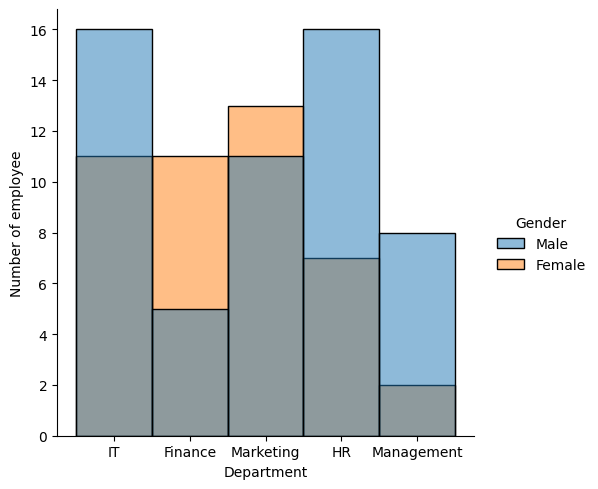

In [6]:
sns.displot(kind='hist', data=df, x='Department',hue='Gender')
plt.ylabel('Number of employee')

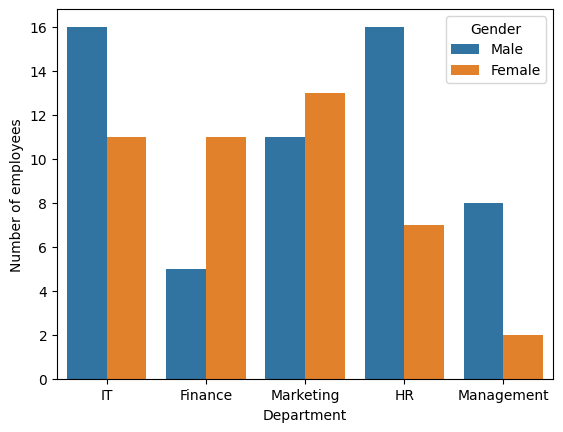

In [8]:
sns.countplot(data=df, x='Department',hue='Gender')
plt.ylabel('Number of employees')
plt.show()